# Client elegibility prediction using logistic regression



In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of clients
num_clients = 600

# 1. Years as a Client (Normally distributed, mean=10 years, std=5 years)
years_as_client = np.random.normal(loc=10, scale=5, size=num_clients)
years_as_client = np.clip(years_as_client, 1, None)  # Ensure no negative values

# 2. Credit Score (Chi-square distribution with k=3, scaled to 300-850 range)
credit_score_raw = np.random.chisquare(df=3, size=num_clients)
credit_score = np.interp(credit_score_raw, (credit_score_raw.min(), credit_score_raw.max()), (300, 850))

# 3. Number of Products (Normally distributed, mean=3 products, std=1.5, clipped between 1 and 5)
num_products = np.random.normal(loc=3, scale=1.5, size=num_clients)
num_products = np.clip(num_products, 1, 5)  # Number of products between 1 and 5

# 4. Missed Payments (Correlated with Number of Products)
# We'll generate missed payments to be positively correlated with the number of products
missed_payments = num_products + np.random.normal(loc=0, scale=0.5, size=num_clients)
missed_payments = np.clip(missed_payments, 0, 5)  # Missed payments between 0 and 5

# 5. Annual Income (Chi-square distribution, concentrated around $60,000 with scaling)
annual_income_raw = np.random.chisquare(df=2, size=num_clients)
annual_income = np.interp(annual_income_raw, (annual_income_raw.min(), annual_income_raw.max()), (30000, 150000))

# 6. Loan Amount (Log-normal distribution, reflecting right-skewness of loan amounts)
loan_amount = np.random.lognormal(mean=10, sigma=0.9, size=num_clients)
loan_amount = np.clip(loan_amount, 1000, 100000)  # Cap loan amounts between $1,000 and $100,000

# 7. Loan Duration in Years (Normally distributed, mean=10 years, std=5 years)
loan_duration_years = np.random.normal(loc=10, scale=5, size=num_clients)
loan_duration_years = np.clip(loan_duration_years, 1, 20)  # Loan duration between 1 and 20 years

# 8. Credit Eligibility (Binary outcome, 0 or 1)
credit_eligibility = np.random.randint(0, 2, num_clients)

# Create the dataset
data = {
    'Client_ID': range(1, num_clients + 1),
    'Years_as_Client': years_as_client,
    'Credit_Score': credit_score,
    'Num_Products': num_products,
    'Annual_Income': annual_income,
    'Loan_Amount': loan_amount,
    'Loan_Duration_Years': loan_duration_years,
    'Missed_Payments': missed_payments,
    'Credit_Eligibility': credit_eligibility
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Round the numerical values for better readability
df = df.round({
    'Years_as_Client': 1,
    'Credit_Score': 0,
    'Num_Products': 0,
    'Annual_Income': 0,
    'Loan_Amount': 0,
    'Loan_Duration_Years': 1,
    'Missed_Payments': 0
})

# Show first few rows of the dataset
print(df.head())

# Check correlation between Num_Products and Missed_Payments
correlation = df[['Num_Products', 'Missed_Payments']].corr()
print("\nCorrelation between 'Num_Products' and 'Missed_Payments':")
print(correlation)

# Save the dataset to a CSV file
df.to_csv('client_credit_data_correlated.csv', index=False)

   Client_ID  Years_as_Client  Credit_Score  Num_Products  Annual_Income  \
0          1             12.5         476.0           4.0        48794.0   
1          2              9.3         334.0           1.0        77529.0   
2          3             13.2         434.0           3.0        44035.0   
3          4             17.6         669.0           5.0        43693.0   
4          5              8.8         308.0           1.0        31014.0   

   Loan_Amount  Loan_Duration_Years  Missed_Payments  Credit_Eligibility  
0       7801.0                  6.3              4.0                   1  
1       4824.0                 19.5              1.0                   0  
2       4383.0                 10.2              3.0                   0  
3       6504.0                 13.8              5.0                   1  
4      11636.0                  7.0              2.0                   1  

Correlation between 'Num_Products' and 'Missed_Payments':
                 Num_Products  Mis

Now that data has been created, it is possible to: do an exploratory analysis, 

* Finding and handling missing values
* evaluating the distribution of independent and response variables
* Finding co linear variables 

   Client_ID  Years_as_Client  Credit_Score  Num_Products  Annual_Income  \
0          1             12.5         476.0           4.0        48794.0   
1          2              9.3         334.0           1.0        77529.0   
2          3             13.2         434.0           3.0        44035.0   
3          4             17.6         669.0           5.0        43693.0   
4          5              8.8         308.0           1.0        31014.0   

   Loan_Amount  Loan_Duration_Years  Missed_Payments  Credit_Eligibility  
0       7801.0                  6.3              4.0                   1  
1       4824.0                 19.5              1.0                   0  
2       4383.0                 10.2              3.0                   0  
3       6504.0                 13.8              5.0                   1  
4      11636.0                  7.0              2.0                   1  

Summary Statistics:

        Client_ID  Years_as_Client  Credit_Score  Num_Products  Annual_

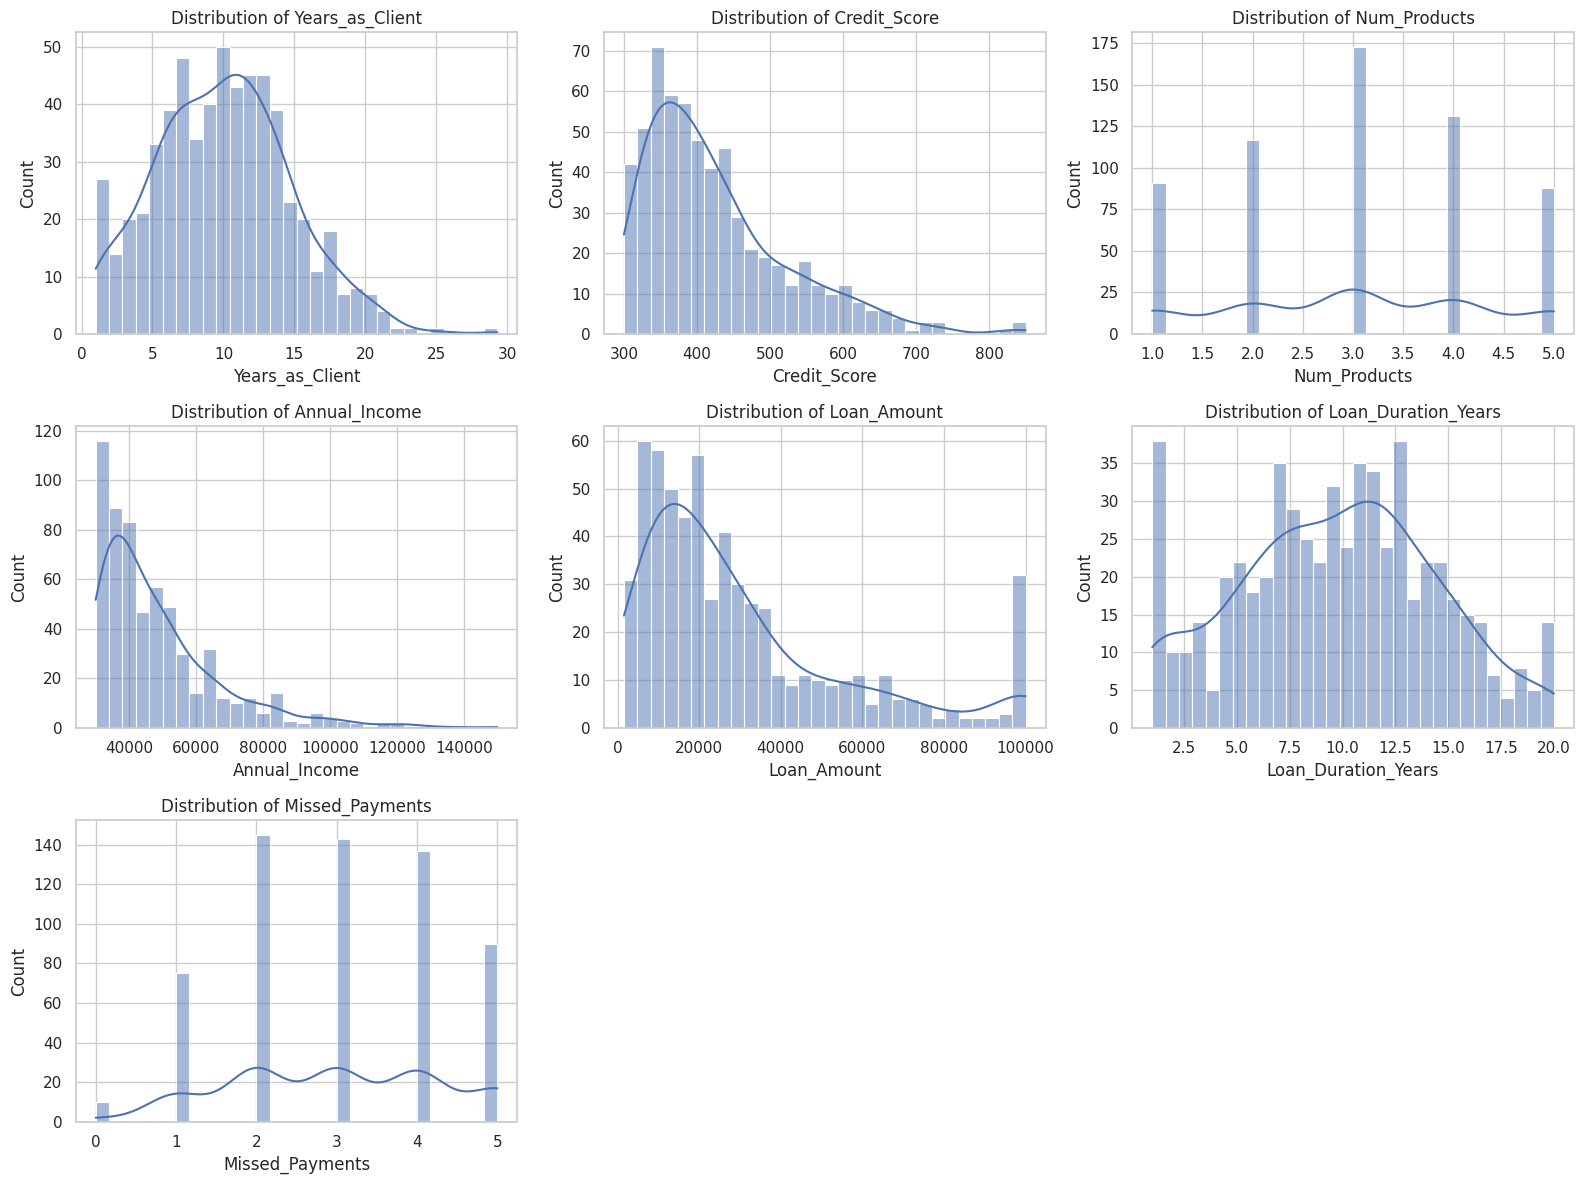

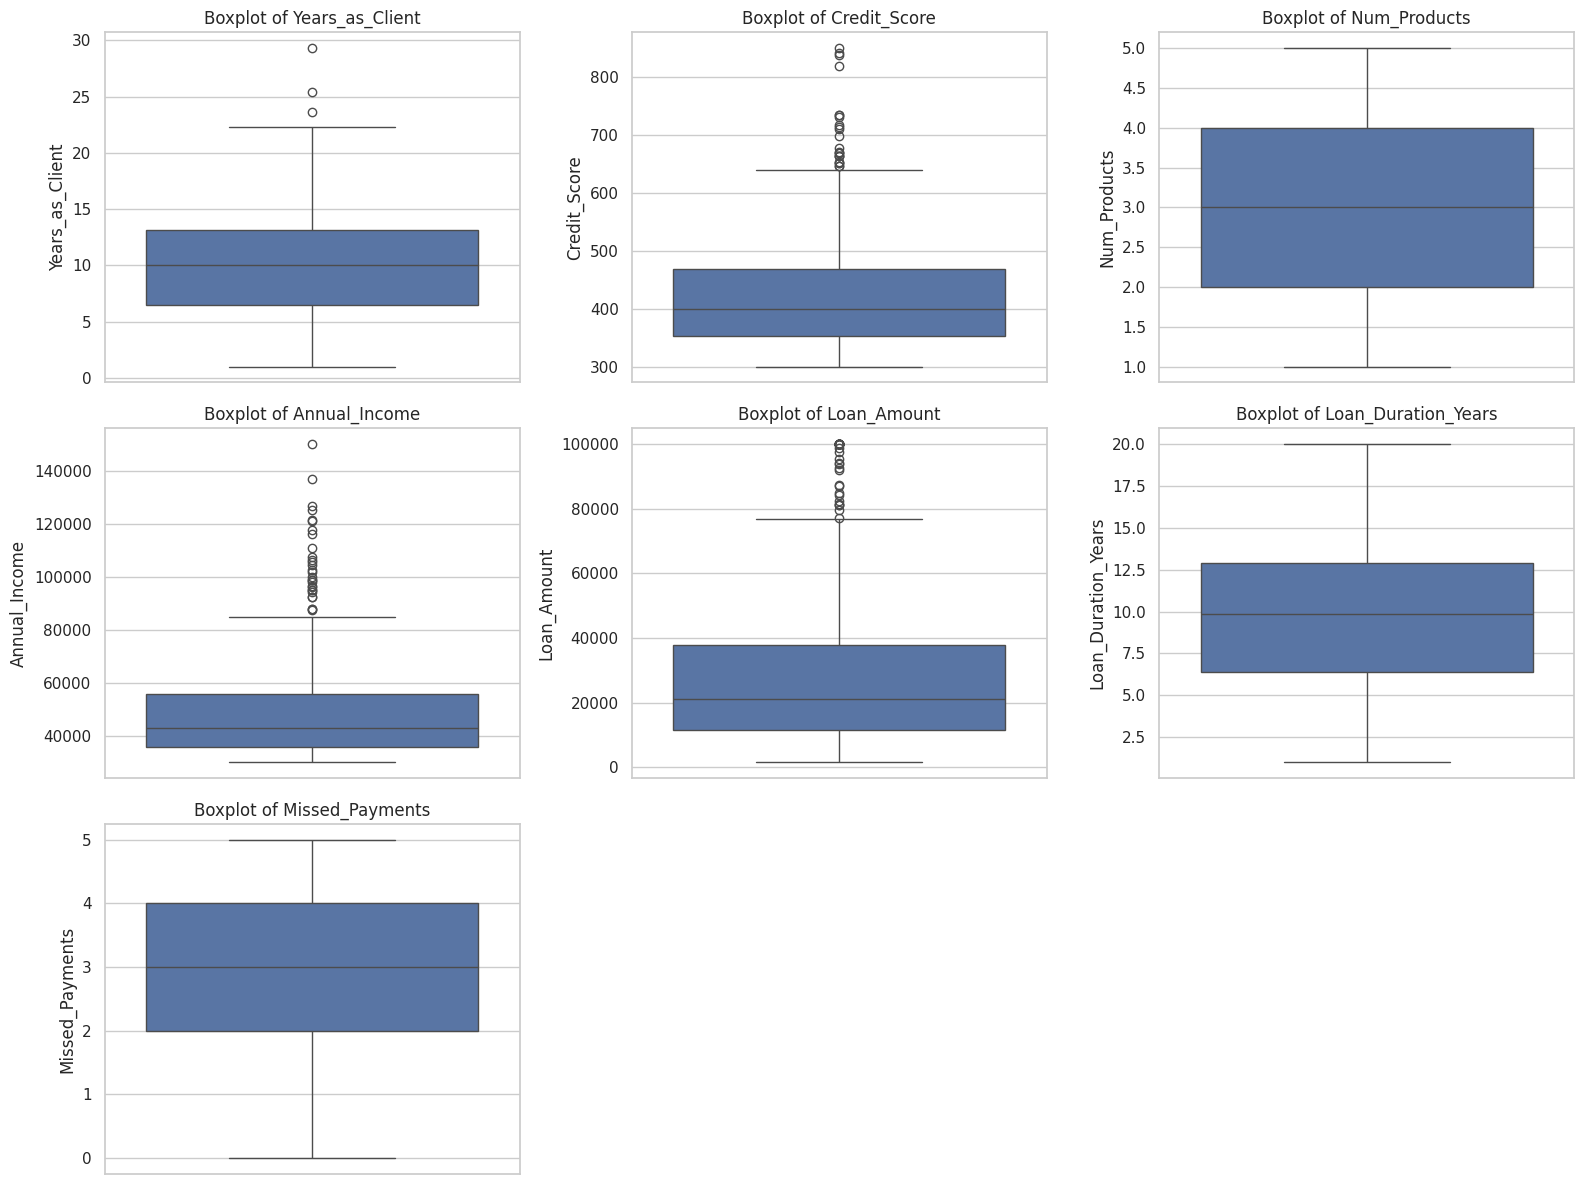

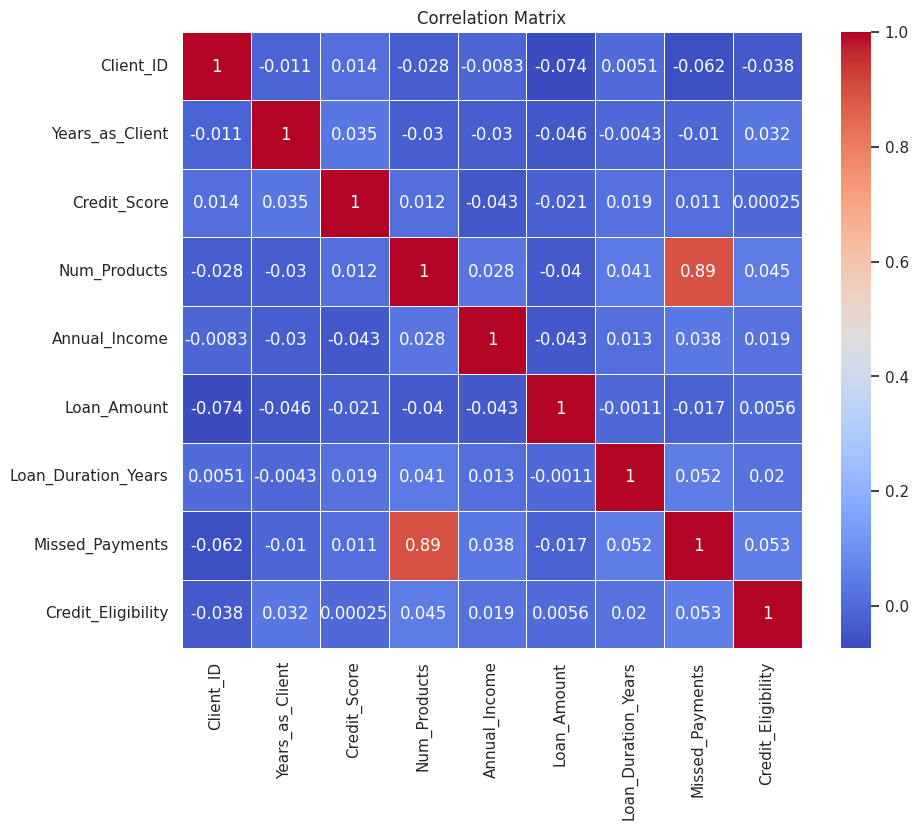


Correlation with Credit Eligibility:

Credit_Eligibility     1.000000
Missed_Payments        0.053446
Num_Products           0.044639
Years_as_Client        0.031727
Loan_Duration_Years    0.019617
Annual_Income          0.018838
Loan_Amount            0.005583
Credit_Score           0.000255
Client_ID             -0.038491
Name: Credit_Eligibility, dtype: float64


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('client_credit_data_correlated.csv')

# Set the style for seaborn plots
sns.set(style='whitegrid')

# Display the first few rows of the data
print(df.head())

# -----------------------------------------
# 1. Summary Statistics
# -----------------------------------------
print("\nSummary Statistics:\n")
print(df.describe())

# -----------------------------------------
# 2. Check for missing values
# -----------------------------------------
print("\nMissing Values:\n")
print(df.isnull().sum())

# -----------------------------------------
# 3. Visualizing the distributions of variables
# -----------------------------------------

# List of numeric columns to visualize (excluding Client_ID)
numeric_columns = ['Years_as_Client', 'Credit_Score', 'Num_Products', 'Annual_Income', 'Loan_Amount', 
                   'Loan_Duration_Years', 'Missed_Payments']

# Plot histograms for each numeric variable
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# -----------------------------------------
# 4. Boxplots to check for outliers
# -----------------------------------------
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# -----------------------------------------
# 5. Correlation Matrix
# -----------------------------------------

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# -----------------------------------------
# 6. Correlation with Target Variable
# -----------------------------------------
print("\nCorrelation with Credit Eligibility:\n")
print(correlation_matrix['Credit_Eligibility'].sort_values(ascending=False))

Since `num _of_products` and `missed_payments` are correlated, we can drop `num_of_products`

In [3]:
# Drop the 'Num_Products' column from the dataset
df.drop(columns=['Num_Products'], inplace=True)

# Display the first few rows to verify the column has been dropped
print(df.head())

   Client_ID  Years_as_Client  Credit_Score  Annual_Income  Loan_Amount  \
0          1             12.5         476.0        48794.0       7801.0   
1          2              9.3         334.0        77529.0       4824.0   
2          3             13.2         434.0        44035.0       4383.0   
3          4             17.6         669.0        43693.0       6504.0   
4          5              8.8         308.0        31014.0      11636.0   

   Loan_Duration_Years  Missed_Payments  Credit_Eligibility  
0                  6.3              4.0                   1  
1                 19.5              1.0                   0  
2                 10.2              3.0                   0  
3                 13.8              5.0                   1  
4                  7.0              2.0                   1  


Now the response variable `credit_elegibility` is created considering the bank data of customers, and setting tresholds on the variables

In [4]:
# Define the conditions based on which a customer is considered eligible (1) or not (0)
df['Credit_Eligibility'] = np.where(
    (df['Credit_Score'] >= 600) &               # Credit Score of 600 or more
    (df['Missed_Payments'] <= 2) &              # No more than 2 missed payments
    (df['Loan_Amount'] / df['Annual_Income'] < 0.4) &  # Loan amount is less than 40% of annual income
    (df['Annual_Income'] >= 40000),             # Minimum income threshold of $40,000
    1,  # Eligible for credit
    0   # Not eligible for credit
)

# Display the first few rows of the updated DataFrame
print(df[['Credit_Score', 'Missed_Payments', 'Loan_Amount', 'Annual_Income', 'Credit_Eligibility']].head())

   Credit_Score  Missed_Payments  Loan_Amount  Annual_Income  \
0         476.0              4.0       7801.0        48794.0   
1         334.0              1.0       4824.0        77529.0   
2         434.0              3.0       4383.0        44035.0   
3         669.0              5.0       6504.0        43693.0   
4         308.0              2.0      11636.0        31014.0   

   Credit_Eligibility  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


Once both dependent and independent variables has been assessed, we can go ahead and build the regression model:

/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


KS Statistic: 0.9885714285714285
AUC: 0.9931428571428571
GINI Coefficient: 0.9862857142857142
PSI: 0.18430898734872925


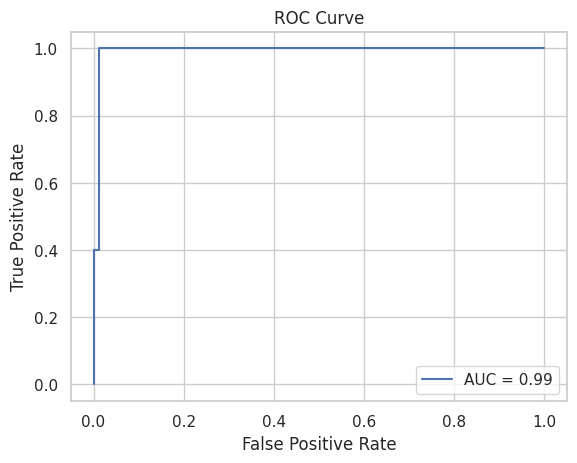

In [5]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Load the dataset (assuming you already have df loaded with Credit_Eligibility)
# X = features, y = target (Credit Eligibility)
X = df.drop(columns=['Credit_Eligibility', 'Client_ID'])
y = df['Credit_Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Cross-validation predictions
y_pred_prob_train = cross_val_predict(logreg, X_train, y_train, cv=5, method='predict_proba')[:, 1]  # Probabilities for class 1
y_pred_prob_test = logreg.fit(X_train, y_train).predict_proba(X_test)[:, 1]  # Test set probabilities

# -------------------------------------------
# 1. KS Statistic (Kolmogorov-Smirnov)
# -------------------------------------------

# Get the KS statistic using the predicted probabilities from the test set
ks_stat, p_value = ks_2samp(y_pred_prob_test[y_test == 1], y_pred_prob_test[y_test == 0])
print(f'KS Statistic: {ks_stat}')

# -------------------------------------------
# 2. GINI Coefficient
# -------------------------------------------

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_prob_test)
gini = 2 * auc - 1
print(f'AUC: {auc}')
print(f'GINI Coefficient: {gini}')

# -------------------------------------------
# 3. PSI (Population Stability Index)
# -------------------------------------------

def calculate_psi(expected, actual, buckettype='bins', buckets=10):
    """Calculate the PSI (Population Stability Index)"""
    def scale_range(input, min_val, max_val):
        input += -(np.min(input))
        input /= np.max(input) / (max_val - min_val)
        input += min_val
        return input
    
    breakpoints = np.arange(0, buckets + 1) / buckets * 100
    if buckettype == 'bins':
        bins = np.percentile(expected, breakpoints)
    elif buckettype == 'quantiles':
        bins = np.linspace(0, 1, num=buckets + 1)
    expected_percents = np.histogram(expected, bins=bins)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=bins)[0] / len(actual)
    psi_value = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))
    return psi_value

# Calculate PSI between training and test sets
psi_value = calculate_psi(y_pred_prob_train, y_pred_prob_test)
print(f'PSI: {psi_value}')

# -------------------------------------------
# Visualizations
# -------------------------------------------

# ROC Curve plot
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_test)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()